## Advertising Dataset (Linear Regression and Assumption Analysis) ##

### Objective ###

Generate a linear regression on the advertising dataset and analyze the model. Also, review the regression assumptions and make sure they are met with the model.

The following are the regression assumptions:
  - **Linear Relationship**: There is a linear relationship between the independent variable, x, and the dependent variable, y.
  - **Multicollinearity**: There is no linear relationship between independent variables.
  - **Autocorrelation**: The residuals are independent. In particular, there is no correlation between consecutive residuals in time series data.
  - **Homoscedasticity**: The residuals have constant variance at every level of x.
  - **Residual Normal Distribution** - The residuals of the model should be normally distributed.
 
**Note:** The dataset used in this notebook is the well known 'Advertising Dataset' of ISLR Package.


### Method ### 

 - Observe the relationship between the independent variables and dependent variables using a scatter plot.
 - Generate the Linear Regression Model (Ordinary Least Square).
 - Observe the independence of the residual. Analyze using the Durbin Watson Test.
 - Observe the Homoscedasticity of the model. Analyze by plotting residual vs fitted value.
 - Observe the distribution of the residual. Analyze by plotting the Quartile-Quartile Plot.


### Analysis ##
 - There is a linear relationship between TV and Sales but not between Radio and Sales, and Newspaper and Sales. Hence, Newspaper and Radio are excluded in the regression model.
 - There is no Multicollinearity between the TV, Radio and Newspaper. However, Radio, and Newspaper are still excluded in the model as they do not have a linear relationship with Sales.
 - The Coefficient of Determination is 0.932 which means that 93.2% of the data fit the regression model.
 - The Durbin Watson Test has a value of 1.645 which is within the acceptable range of 1.5 to 2.5. 1.645 means there is a positive low autocorrelation on the residuals.
 - The residual plot shows that there is a Homoscedasticity relationship on the residuals.
 - Quartile - Quartile plot shows that the residuals follow a Normal Distribution.

In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
import scipy.stats as stats

In [2]:
#The code is used to ignore warnings
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [3]:
#Importing Dataset
df = pd.read_csv('advertising.csv')

In [4]:
#Inspecting the first 5 rows
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
#There is no null values so we do not need to drop or imputate rows.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
#Getting the independent and dependent variables
df_predictors = df[['TV','Radio', 'Newspaper']]
df_response = df['Sales']

#### Linear Test

Text(0.5, 1.0, 'Scatter Plot: TV vs Sales')

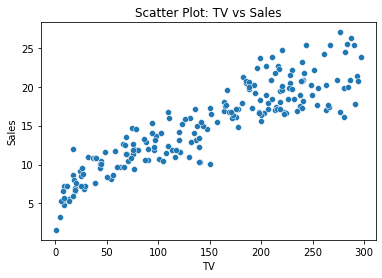

In [7]:
#Scatter Plot TV vs Sales
#The scatter plot shows that there is a correlation between the two variables
scatter_TV = sns.scatterplot(df_predictors['TV'], df_response)
plt.title('Scatter Plot: TV vs Sales')

In [8]:
#Getting the Correlation Coeffiecient of TV and Sales
#The correlation is high. Therefore, the variable will be included on the model
sales = np.array(df['Sales'])
TV = np.array(df['TV'])
coef_TV_sales = np.corrcoef(TV, sales)
corr_coef_TV_sales = coef_TV_sales[0][1]
print('Correlation Coefficient of TV and Sales:', round(corr_coef_TV_sales,3))

Correlation Coefficient of TV and Sales: 0.901


Text(0.5, 1.0, 'Scatter Plot: Radio vs Sales')

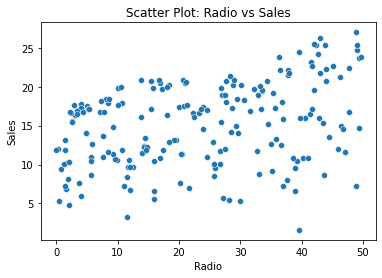

In [9]:
#Scatter Plot Radio vs Sales
#The scatter plot shows that there is no correlation between the two variables
scatter_radio = sns.scatterplot(df_predictors['Radio'], df_response)
plt.title('Scatter Plot: Radio vs Sales')

In [10]:
#Getting the Correlation Coeffiecient of Radio and Sales
#The correlation is low. Therefore, the variable will be excluded on the model
sales = np.array(df['Sales'])
radio = np.array(df['Radio'])
coef_radio_sales = np.corrcoef(radio, sales)
corr_coef_radio_sales = coef_radio_sales[0][1]
print('Correlation Coefficient of Radio and Sales:', round(corr_coef_radio_sales,3))

Correlation Coefficient of Radio and Sales: 0.35


Text(0.5, 1.0, 'Scatter Plot: Newspaper vs Sales')

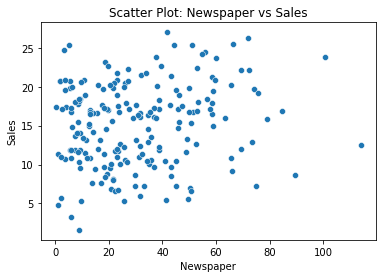

In [11]:
#Scatter Plot Newspaper vs Sales
#The scatter plot shows that there is no correlation between the two variables
scatter_newspaper = sns.scatterplot(df_predictors['Newspaper'], df_response)
plt.title('Scatter Plot: Newspaper vs Sales')

In [12]:
#Getting the Correlation Coeffiecient of Newspaper and Sales
#The correlation is low. Therefore, the variable will be excluded on the model
sales = np.array(df['Sales'])
newspaper = np.array(df['Newspaper'])
coef_newspaper_sales = np.corrcoef(newspaper, sales)
corr_coef_newspaper_sales = coef_newspaper_sales[0][1]
print('Correlation Coefficient of Newspaper and Sales:', round(corr_coef_newspaper_sales,3))

Correlation Coefficient of Newspaper and Sales: 0.158


#### Multicolinearity Test

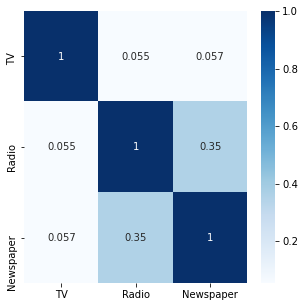

In [13]:
#Computing the Correlation Coefficient of the predictor variables
#They are all not correlation to each other which is good
corr = df_predictors.corr()
plt.figure(figsize=(5,5))
heatmap = sns.heatmap(corr, annot=True, cmap='Blues')

Text(0.5, 1.08, 'Scatter Plot Predictors')

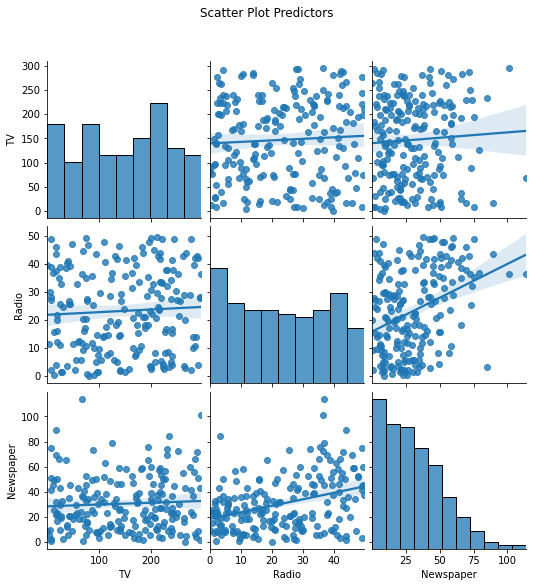

In [14]:
#Visualizing the relationship of each predictor variable
scatterplot = sns.pairplot(df_predictors, diag_kind= 'hist', kind='reg')
scatterplot.fig.suptitle('Scatter Plot Predictors', y=1.08)

#### Generate Regression Model
**Note:** Radio and Newspaper are not considered because they do not have linear relationship with Sales.

In [15]:
X = df['TV']
Y = df['Sales']
reg = sm.OLS(Y,X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Sales   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.931
Method:                 Least Squares   F-statistic:                              2714.
Date:                Sat, 01 May 2021   Prob (F-statistic):                   6.42e-118
Time:                        21:57:58   Log-Likelihood:                         -570.23
No. Observations:                 200   AIC:                                      1142.
Df Residuals:                     199   BIC:                                      1146.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0909      0.002     52.092      0.000       0.087       0.094
==============================================================================
Omnibus:                        9.476   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               10.081
Skew:                          -0.540   Prob(JB):                      0.00647
Kurtosis:                       2.792   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Autocorrelation Test

In [16]:
#Performing Durbin Watson Test to determine autocorrelation
dwtest = durbin_watson(reg.resid)
print('Durbin Watson:', round(dwtest,3))
print('The acceptable range is 1.5 to 2.5')


Durbin Watson: 1.645
The acceptable range is 1.5 to 2.5


#### Homoscedasticity Test

Text(0.5, 1.0, 'Homoscedasticity Plot')

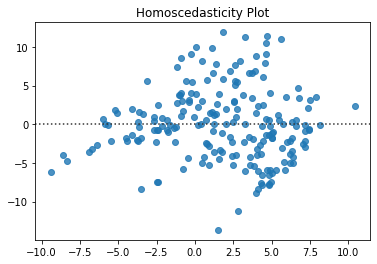

In [17]:
sns.residplot(reg.resid, reg.predict(X))
plt.title('Homoscedasticity Plot')

#### Residual Normal Test

Text(0.5, 1.0, 'Quantile-Quantile Plot')

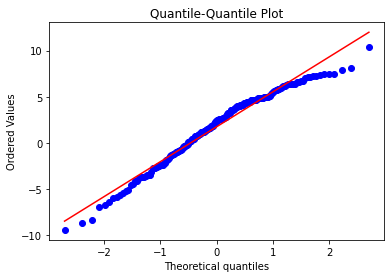

In [18]:
stats.probplot(reg.resid, dist='norm', plot=plt)
plt.show
plt.title('Quantile-Quantile Plot')

### Conclusion ###

The generated model has a 93.2% Coefficient of Determination. Only TV is considered as a predictor variable as the other variables do not have a linear relationship with Sales. The generated model passed all the linear regression assumptions.